<a href="https://colab.research.google.com/github/ASaragga/ARE/blob/main/FCL01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
using Pkg
Pkg.add(["MonteCarloMeasurements", "Distributions"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [18]:
using MonteCarloMeasurements, Distributions, Plots

Valor da Empresa (V): Valor no Horizonte (VH) dado por Perpetuidade (g)

In [17]:
function DCFP(FC, WACC, g)
    H = length(FC) # Número de fluxos de caixa livres projectados até ao horizonte H

    # Descontando os fluxos de caixa livres até ao horizonte
    FC_descontados = sum(FC[t] / (1 + WACC)^t for t in 1:H)

    # Valor no Horizonte VH assumindo uma perpetuidade
    VH = FC[end] * (1 + g) / (WACC - g)
    VH_descontado = VH / (1 + WACC)^H

    # Valor da empresa
    V = FC_descontados + VH_descontado
    return V
end

DCFP (generic function with 1 method)

Valor da Empresa (V): Valor no Horizonte (VH) dado por Múltiplo (m)

In [19]:
function DCFM(FC, WACC, m)
    H = length(FC) # Número de fluxos de caixa livres projectados até ao horizonte H

    # Descontando os fluxos de caixa livres até ao horizonte
    FC_descontados = sum(FC[t] / (1 + WACC)^t for t in 1:H)

    # Valor no Horizonte VH assumindo multiplo (m) de empresas comparáveis
    VH = m * FC[end]
    VH_descontado = VH / (1 + WACC)^H

    # Valor da empresa
    V = FC_descontados + VH_descontado
    return V
end

DCFM (generic function with 1 method)

**Exemplo 01**

Incerteza:      
*   FCL ~ Normal

Constantes:
*   WACC
*   g

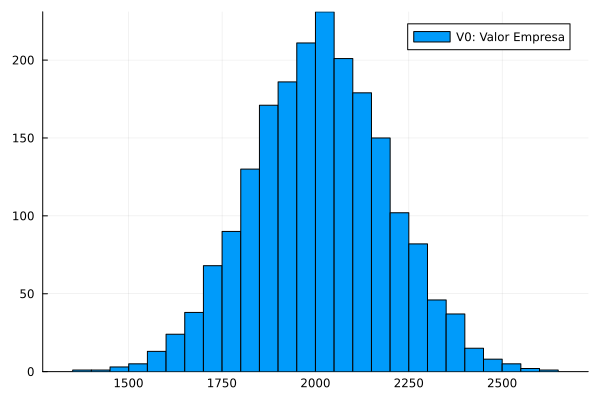

In [20]:
FCL1 = 100 * (1 ± 0.05)   #  Aqui ± representa uma distribuição normal N(0, 0.05)
FCL2 = 115 * (1 ± 0.07)   #  Aqui ± representa uma distribuição normal N(0, 0.07)
FCL3 = 130 * (1 ± 0.10)   #  Aqui ± representa uma distribuição normal N(0, 0.10)

WACC = 0.09
g = 0.03

V3 = FCL3*(1+g)/(WACC-g)  # Perpetuidade
V0 = FCL1/(1+WACC) + FCL2/(1+WACC)^2 + FCL3/(1+WACC)^3 + V3/(1+WACC)^3

graf01 = plot(V0,label="V0: Valor Empresa")

In [10]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2012.176303902589
desvio-padrão V0 = 182.35382323642924
VaR(5%) V0 = 1710.434445220647


**Exemplo 02**

Incerteza:      
*   FCL ~ Normal
*   WACC ~ Triangular
*   g ~ Normal Truncada

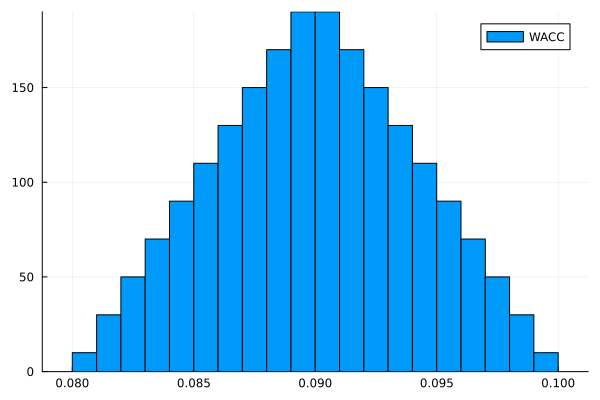

In [11]:
WACC = Particles(2000, TriangularDist(0.08,0.10,0.09))
plot(WACC, label = "WACC")

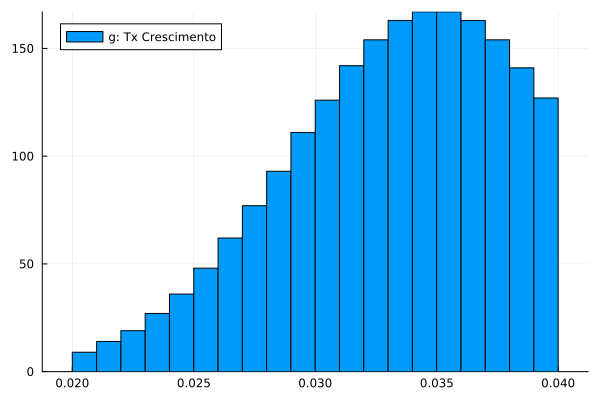

In [12]:
g = Particles(2000, truncated(Normal(0.035,0.006), 0.02, 0.04))
plot(g, label = "g: Tx Crescimento")

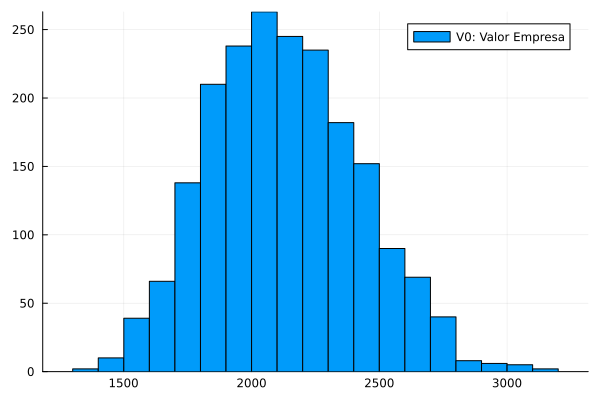

In [13]:
V0 = DCFP([FCL1, FCL2, FCL3],WACC,g)
graf02 = plot(V0,label="V0: Valor Empresa")

In [15]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2130.9913441820936
desvio-padrão V0 = 293.33352512462983
VaR(5%) V0 = 1676.7672848302643


**Exemplo 03**: Valor da empresa no horizonte dado por múltiplo FCL (m)

Incerteza:      
*   FCL ~ Normal
*   WACC ~ Triangular
*   m ~ Triangular

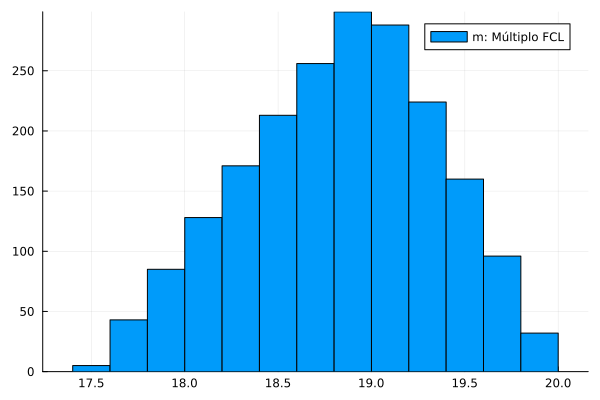

In [26]:
m = Particles(2000, TriangularDist(17.5,20.0,19.0))
plot(m, label = "m: Múltiplo FCL")

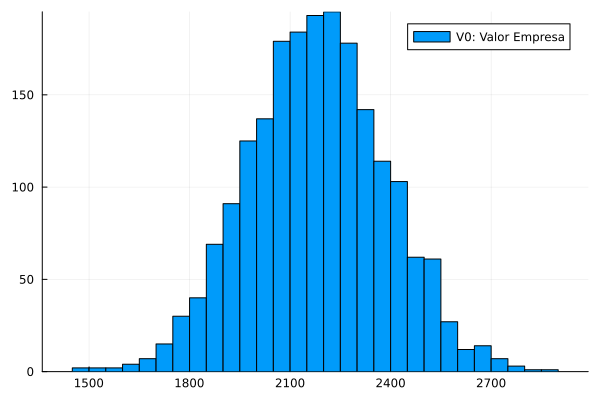

In [27]:
V0 = DCFM([FCL1, FCL2, FCL3],WACC,m)
graf03 = plot(V0,label="V0: Valor Empresa")

In [28]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2179.4111023304204
desvio-padrão V0 = 205.0259083872978
VaR(5%) V0 = 1848.7919192797945
